<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [ ]:
# Importing pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
7,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
8,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas


In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [ ]:
netflix_df.shape

(4812, 11)

In [ ]:
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [ ]:
netflix_df["release_year"]

0       2016
1       2011
2       2009
3       2008
4       2016
        ... 
4807    2009
4808    2018
4809    2006
4810    2005
4811    2015
Name: release_year, Length: 4812, dtype: int64

In [ ]:
netflix_df.loc[:,"release_year"]

0       2016
1       2011
2       2009
3       2008
4       2016
        ... 
4807    2009
4808    2018
4809    2006
4810    2005
4811    2015
Name: release_year, Length: 4812, dtype: int64

In [ ]:
netflix_df.iloc[:,7]

0       2016
1       2011
2       2009
3       2008
4       2016
        ... 
4807    2009
4808    2018
4809    2006
4810    2005
4811    2015
Name: release_year, Length: 4812, dtype: int64

In [ ]:
# 1. Filter the data for movies released in the 1990s

movies_df = netflix_df[netflix_df["type"] == "Movie"]

movies_released_90s_df = movies_df [np.logical_and(movies_df["release_year"] >= 1990, movies_df["release_year"] < 1999)]

print(movies_released_90s_df[["type", "release_year"]].head(10))

      type  release_year
6    Movie          1997
118  Movie          1993
145  Movie          1998
167  Movie          1996
194  Movie          1993
240  Movie          1990
320  Movie          1998
333  Movie          1991
352  Movie          1994
410  Movie          1997


In [ ]:
# 2. Find the most frequent movie duration

duration = movies_released_90s_df["duration"].mode()[0]
print(f"duration: {duration}")

duration: 94


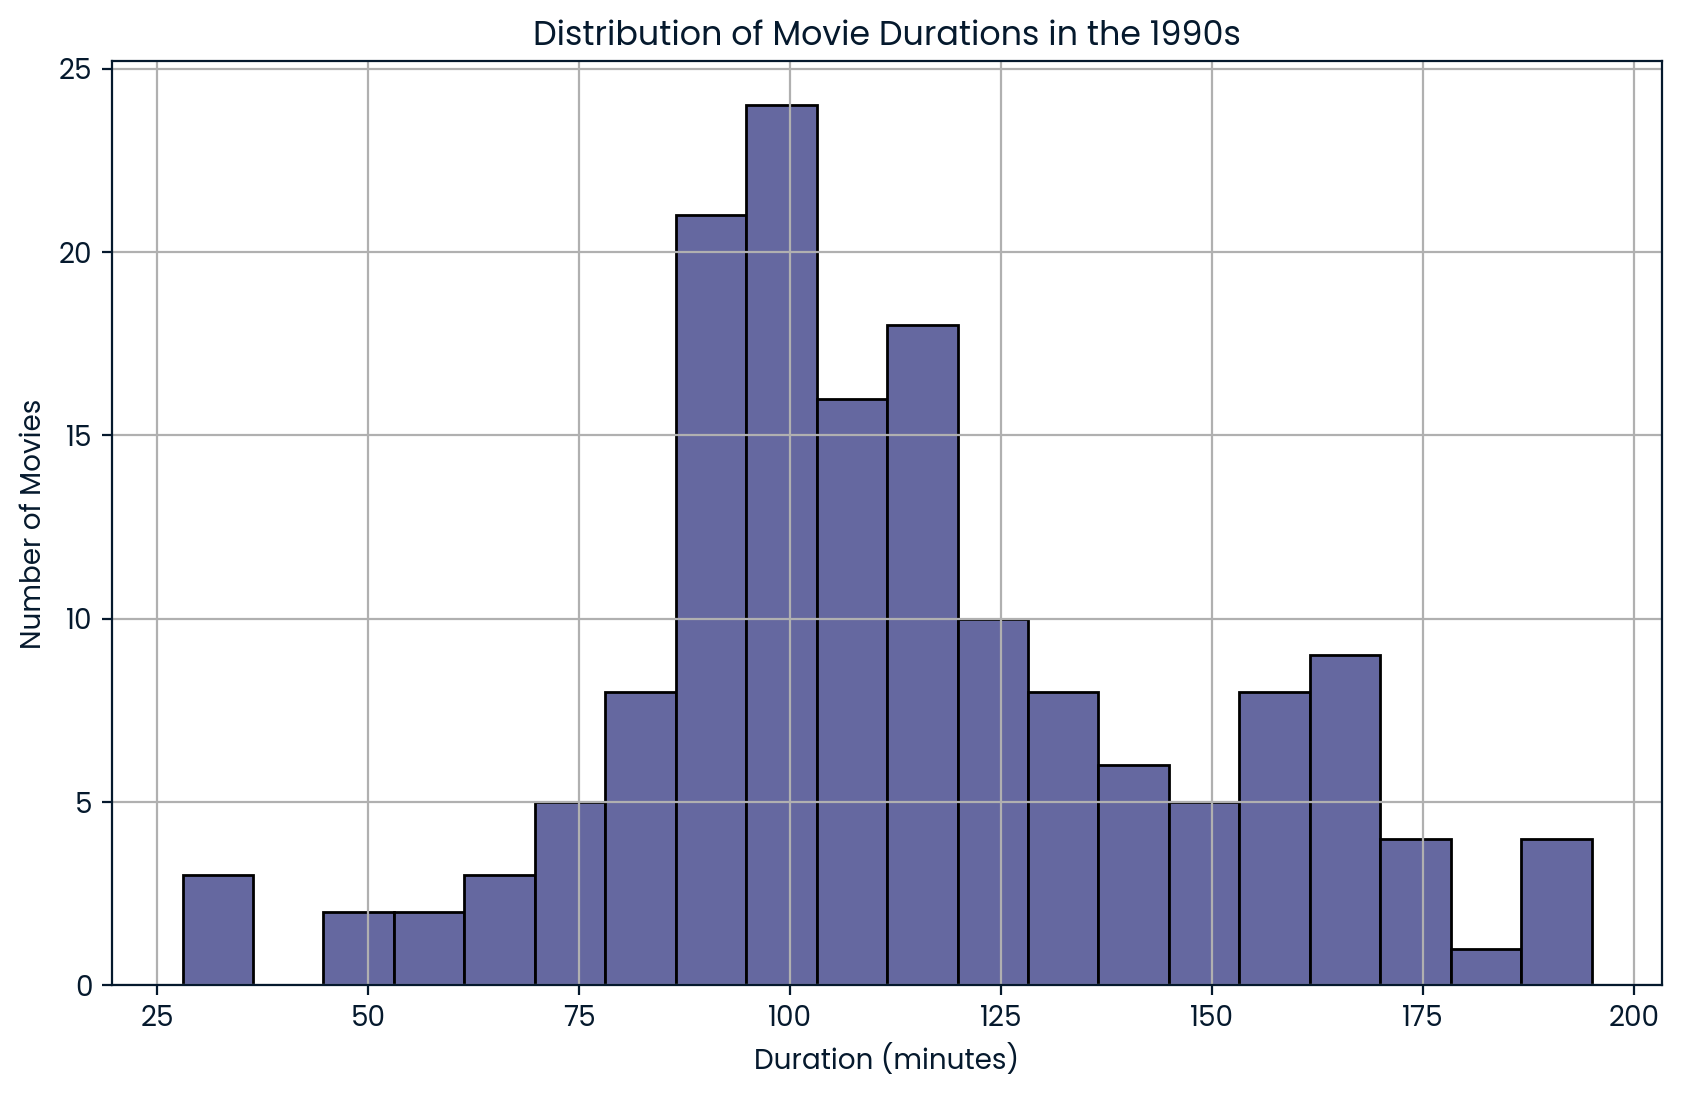

In [ ]:
# The distributions of durations for movies release in the 1990s
plt.figure(figsize=(10, 6))
plt.hist(movies_released_90s_df['duration'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Cargar el archivo de datos de Netflix
netflix_df = pd.read_csv("netflix_data.csv")

# Filtrar películas de los años 90 y tipo 'Movie'
movies_90s_df = netflix_df[(netflix_df['type'] == 'Movie') &
                           (netflix_df['release_year'].between(1990, 1999))]

# Filtrar películas de acción de los años 90
action_movies_90s_df = movies_90s_df[movies_90s_df['genre'].str.contains('Action', na=False)]

# Contar películas con duración < 90 minutos en los años 90
short_movie_count = 0

for index, row in movies_90s_df.iterrows():
    if row['duration'] < 90:
        short_movie_count += 1

print(f"Number of movies with duration less than 90 minutes in the 1990s: {short_movie_count}")


Number of movies with duration less than 90 minutes in the 1990s: 34
